In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data= pd.read_csv(r"C:\Users\praka\Downloads\archive (5)/Airplane_Crashes.csv") 

In [13]:
data 

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [14]:
# Display the first few rows of the dataset to understand its structure
data.head() 


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [15]:
# Check for duplicates in the dataset
duplicate_rows = data.duplicated()

# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display duplicate status and missing values count
duplicate_status = duplicate_rows.any()
missing_values_summary = missing_values[missing_values > 0]

duplicate_status, missing_values_summary 


(False,
 Time            2219
 Location          20
 Operator          18
 Flight #        4199
 Route           1706
 Type              27
 Registration     335
 cn/In           1228
 Aboard            22
 Fatalities        12
 Ground            22
 Summary          390
 dtype: int64)

In [16]:
# Filling missing time with 'Unknown'
data['Time'].fillna('Unknown', inplace=True)

# Filling missing location, operator, flight number, route, type, registration, cn/In with 'Unknown'
data['Location'].fillna('Unknown Location', inplace=True)
data['Operator'].fillna('Unknown Operator', inplace=True)
data['Flight #'].fillna('Unknown', inplace=True)
data['Route'].fillna('Unknown Route', inplace=True)
data['Type'].fillna('Unknown Type', inplace=True)
data['Registration'].fillna('Unknown', inplace=True)
data['cn/In'].fillna('Unknown', inplace=True)

# Filling numeric missing values (Aboard, Fatalities, Ground) with 0
data['Aboard'].fillna(0, inplace=True)
data['Fatalities'].fillna(0, inplace=True)
data['Ground'].fillna(0, inplace=True)

# Filling missing summaries with 'No Summary Available'
data['Summary'].fillna('No Summary Available', inplace=True)

# Check if there are any missing values remaining
missing_values_after = data.isnull().sum()

missing_values_after[missing_values_after > 0]  # Display any remaining missing values, if any 


Series([], dtype: int64)

In [23]:
# Display the first few rows of the monthly and yearly crash trends directly
monthly_trends.head()


,Year,Month,crashes
0,1908,9,1
1,1912,7,1
2,1913,8,1
3,1913,9,1
4,1913,10,1


<Figure size 1200x600 with 0 Axes>

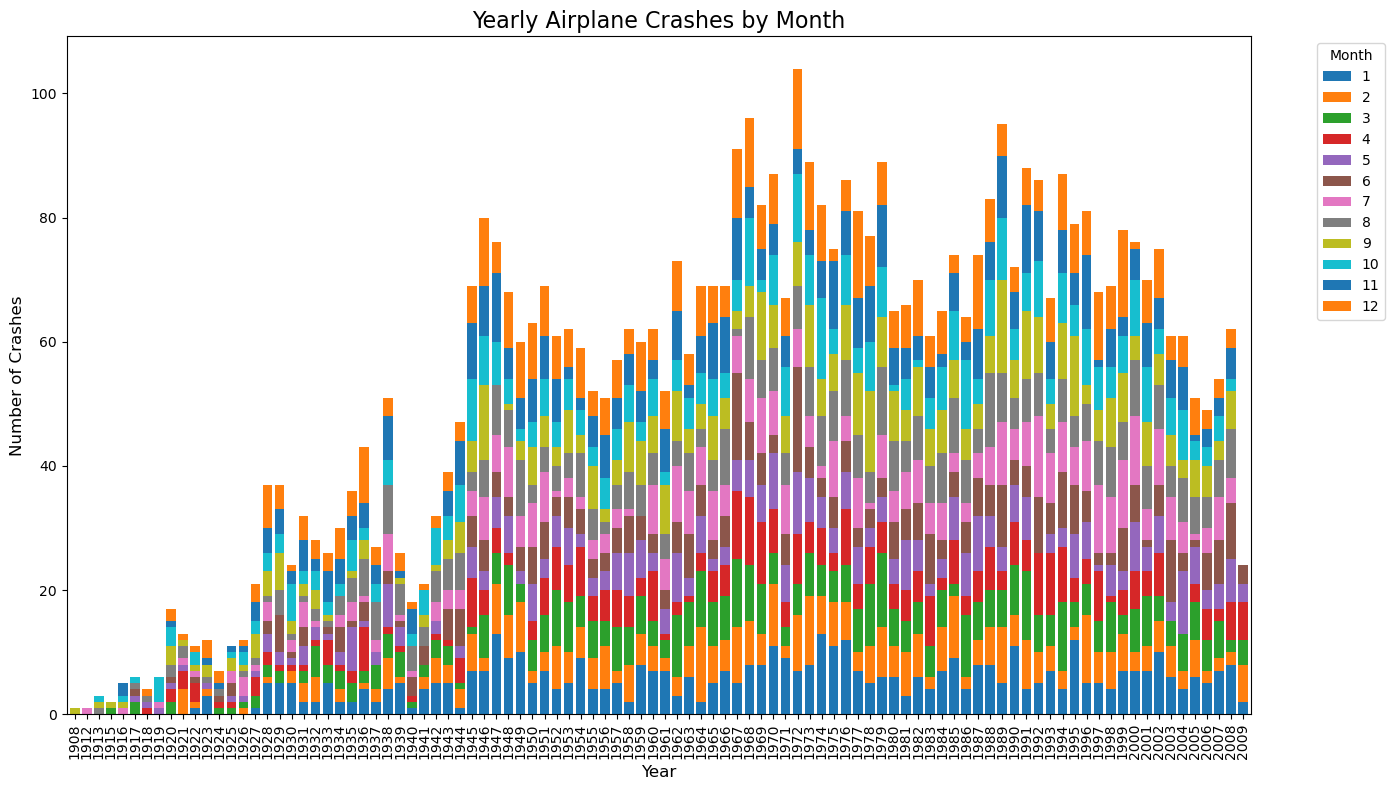

In [24]:
# Pivot the data to make it suitable for plotting, with 'Year' on the x-axis and 'Month' as categories
monthly_pivot = monthly_trends.pivot(index='Year', columns='Month', values='crashes').fillna(0)

# Plotting the crash trends by month and year
plt.figure(figsize=(12, 6))
monthly_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)

# Adding labels and title
plt.title("Yearly Airplane Crashes by Month", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Crashes", fontsize=12)
plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


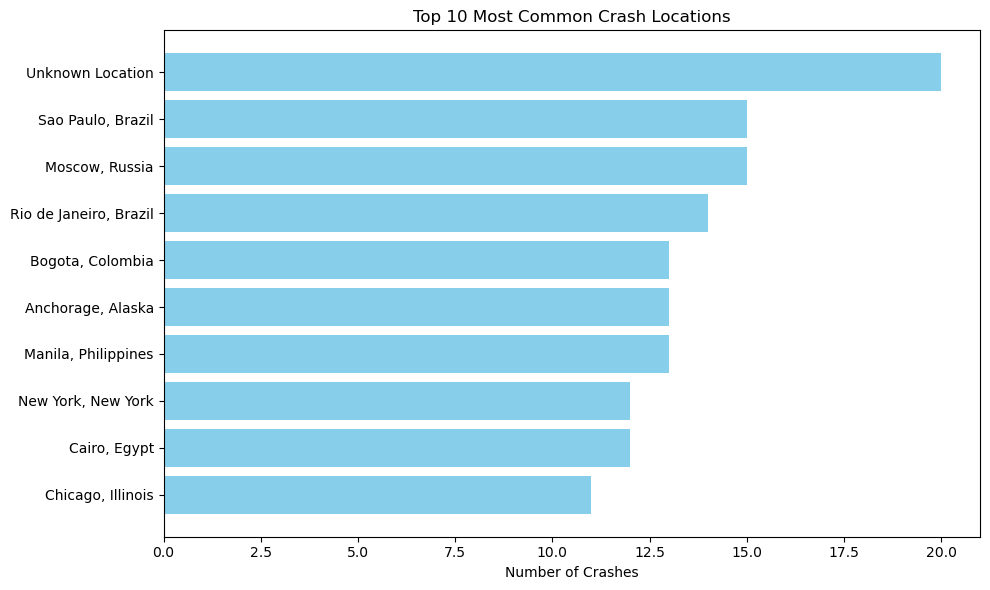

In [25]:
# Group by 'Location' to find the top 10 locations with the most crashes
top_locations = data['Location'].value_counts().head(10).reset_index(name='crashes')
top_locations.columns = ['Location', 'Crashes']

# Plotting the top 10 crash locations
plt.figure(figsize=(10, 6))
plt.barh(top_locations['Location'], top_locations['Crashes'], color='skyblue')
plt.xlabel('Number of Crashes')
plt.title('Top 10 Most Common Crash Locations')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()

# Show the plot
plt.show()


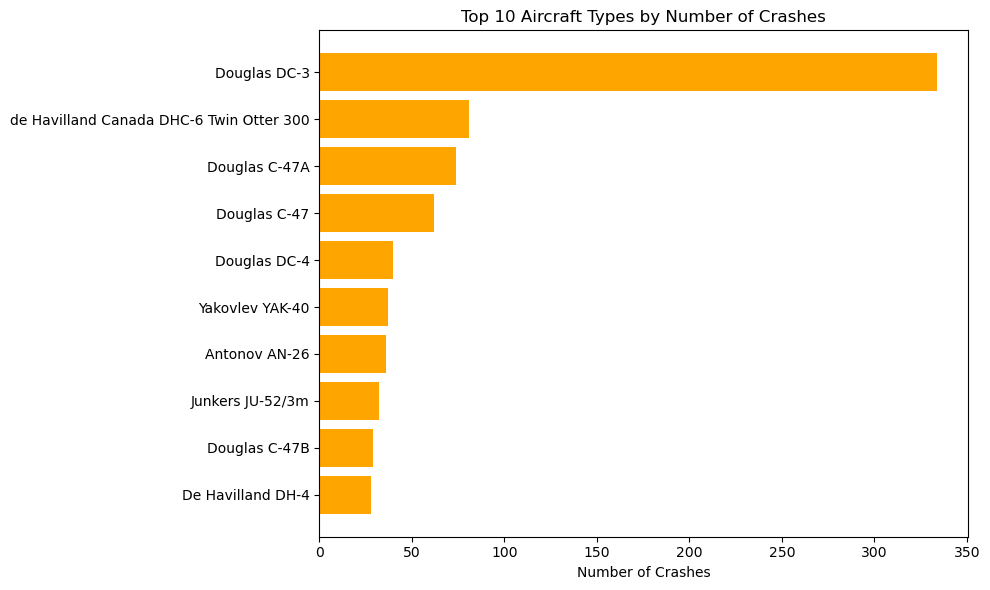

In [26]:
# Group by 'Type' to find the top 10 aircraft types with the most crashes
top_aircraft_types = data['Type'].value_counts().head(10).reset_index(name='crashes')
top_aircraft_types.columns = ['Type', 'Crashes']

# Plotting the top 10 aircraft types with the most crashes
plt.figure(figsize=(10, 6))
plt.barh(top_aircraft_types['Type'], top_aircraft_types['Crashes'], color='orange')
plt.xlabel('Number of Crashes')
plt.title('Top 10 Aircraft Types by Number of Crashes')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()

# Show the plot
plt.show()


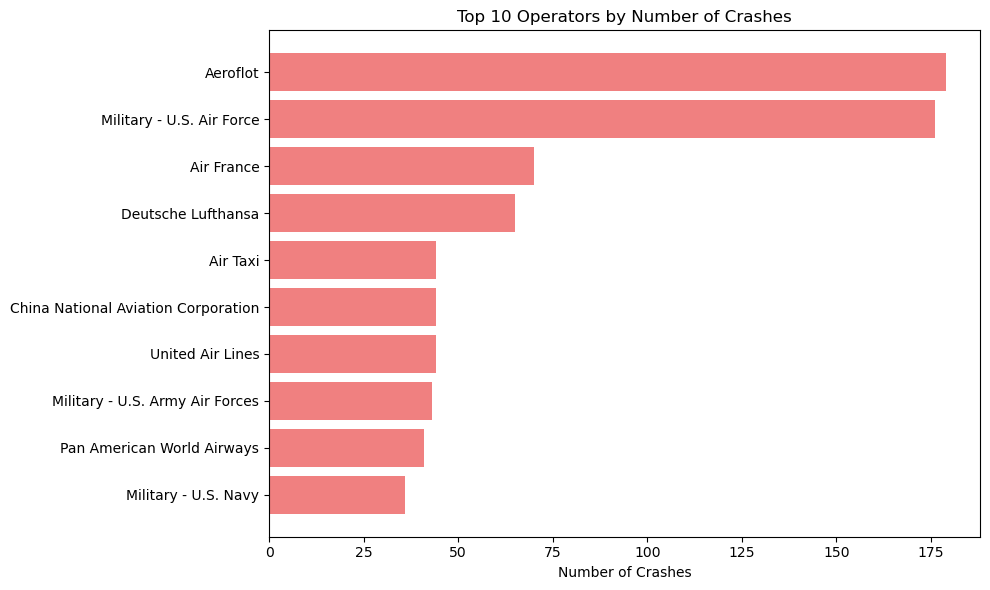

In [27]:
# Group by 'Operator' to find the top 10 operators with the most crashes
top_operators = data['Operator'].value_counts().head(10).reset_index(name='crashes')
top_operators.columns = ['Operator', 'Crashes']

# Plotting the top 10 operators with the most crashes
plt.figure(figsize=(10, 6))
plt.barh(top_operators['Operator'], top_operators['Crashes'], color='lightcoral')
plt.xlabel('Number of Crashes')
plt.title('Top 10 Operators by Number of Crashes')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()

# Show the plot
plt.show()


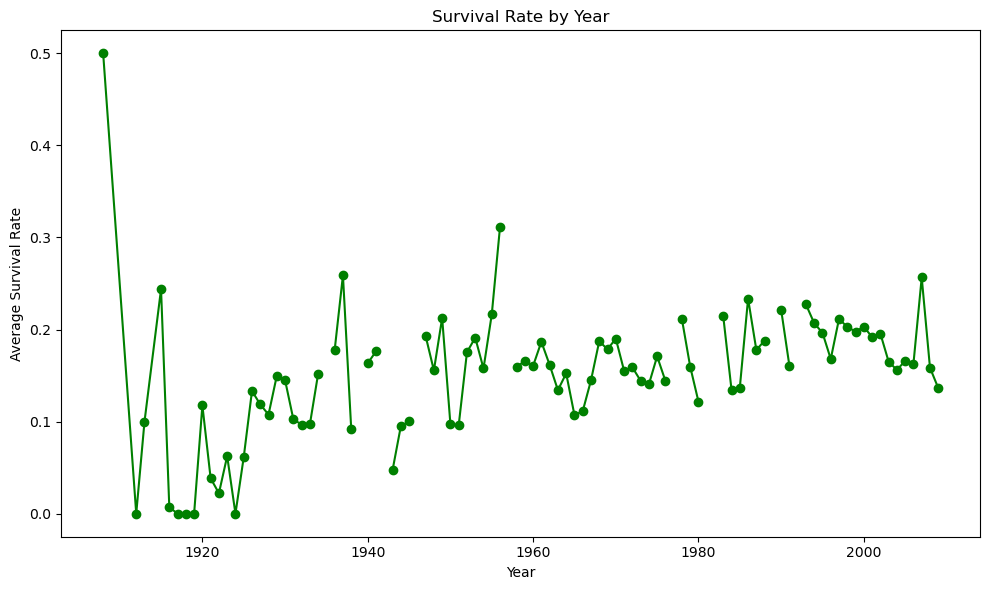

In [28]:
# Calculate survival rate as the ratio of survivors to people on board
data['Survival_Rate'] = (data['Aboard'] - data['Fatalities']) / data['Aboard']

# Group by year to calculate the average survival rate per year
survival_rate_by_year = data.groupby('Year')['Survival_Rate'].mean().reset_index()

# Plotting the survival rate by year
plt.figure(figsize=(10, 6))
plt.plot(survival_rate_by_year['Year'], survival_rate_by_year['Survival_Rate'], marker='o', color='green')
plt.xlabel('Year')
plt.ylabel('Average Survival Rate')
plt.title('Survival Rate by Year')
plt.tight_layout()

# Show the plot
plt.show()


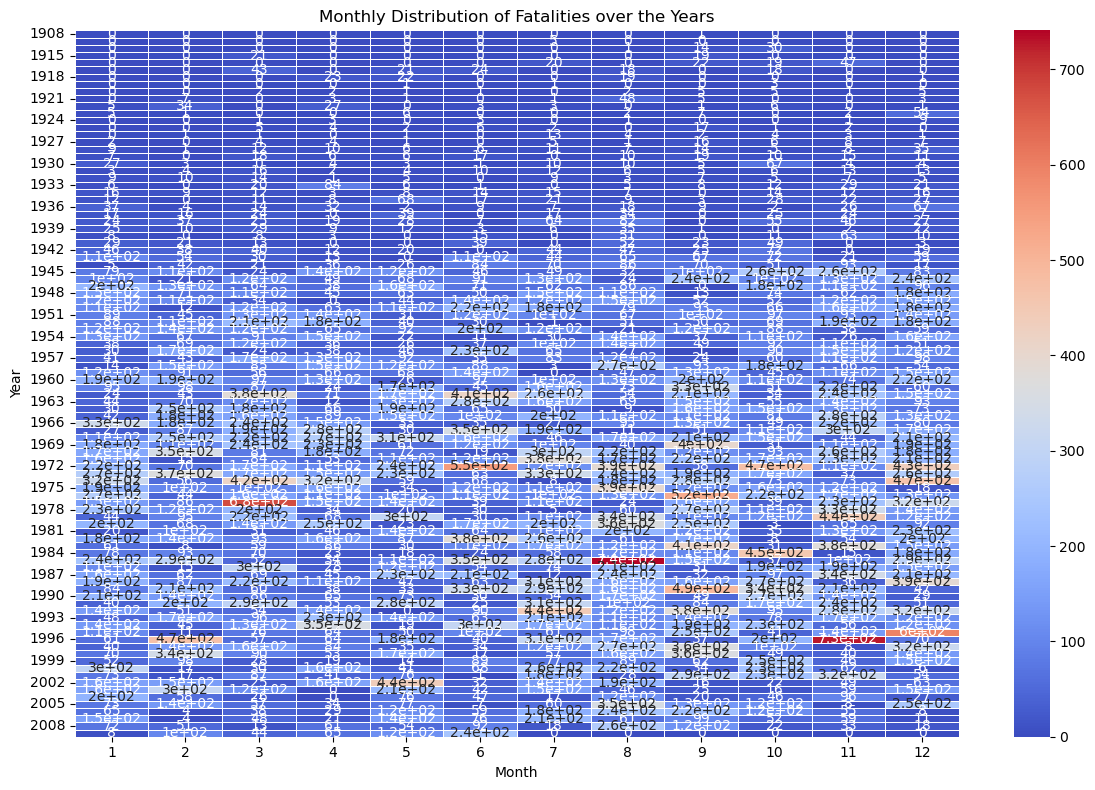

In [29]:
# Create a pivot table for fatalities by year and month
fatalities_heatmap_data = data.pivot_table(index='Year', columns='Month', values='Fatalities', aggfunc='sum').fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(fatalities_heatmap_data, cmap='coolwarm', linewidths=0.5, annot=True)
plt.title('Monthly Distribution of Fatalities over the Years')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


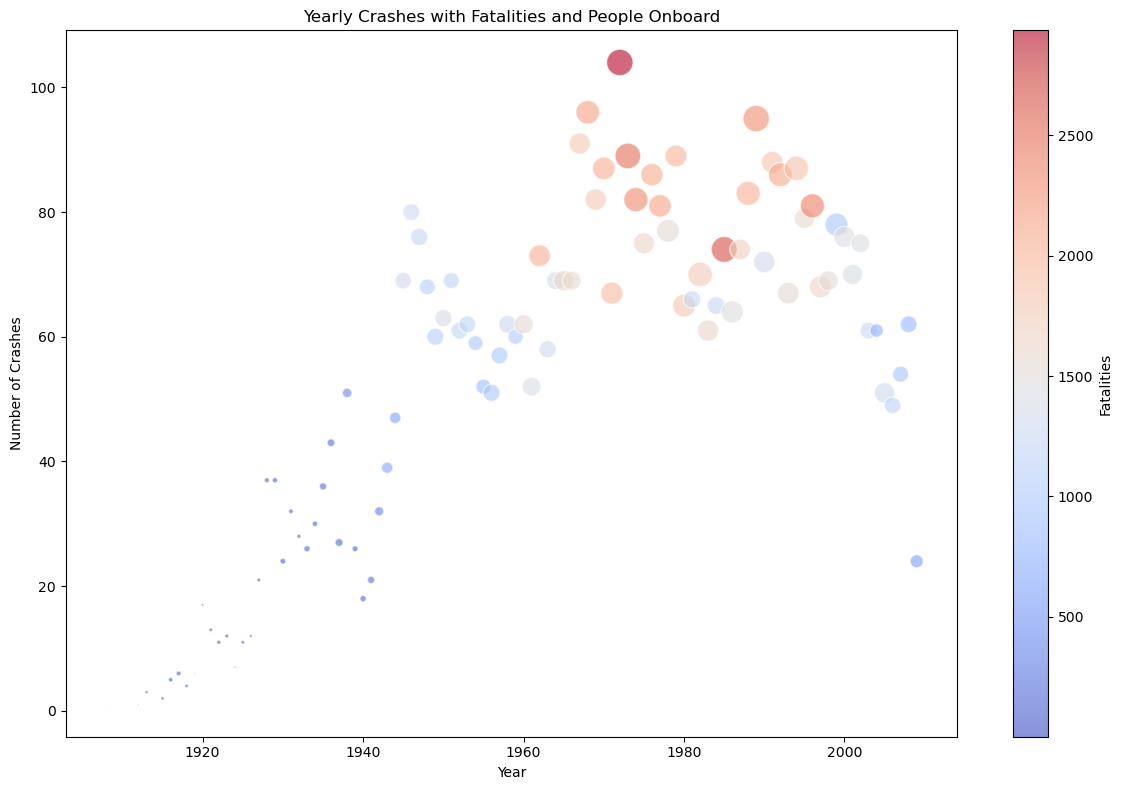

In [30]:
# Prepare data for bubble chart (group by year)
bubble_data = data.groupby('Year').agg(
    crashes=('Date', 'size'),
    people_on_board=('Aboard', 'sum'),
    fatalities=('Fatalities', 'sum')
).reset_index()

# Create a bubble chart
plt.figure(figsize=(12, 8))
bubble = plt.scatter(
    bubble_data['Year'], bubble_data['crashes'], 
    s=bubble_data['people_on_board'] / 10,  # Scale bubble size
    c=bubble_data['fatalities'], cmap='coolwarm', alpha=0.6, edgecolors='w'
)

plt.colorbar(bubble, label='Fatalities')
plt.title('Yearly Crashes with Fatalities and People Onboard')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.tight_layout()
plt.show()
